In [1]:
import pandas as pd
import numpy as np
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt

C:\ProgramData\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df_mort = pd.read_csv('thesis_data.csv', usecols = ['AGE', 'YEAR', 'MORTDODY', 'MORTSTAT'])

In [3]:
# remove samples
df_mort = df_mort[(df_mort['MORTSTAT'] == 1.0) | (df_mort['MORTSTAT'] == 2.0)]      # only peoplewiht mortality status tracking
df_mort['AGE_AT_DEATH'] = df_mort['MORTDODY'] - df_mort['YEAR'] + df_mort['AGE']    # define age at death
df_mort['YEAR_BIRTH'] = df_mort['YEAR'] - df_mort['AGE']                            # define year of birth

In [4]:
bins = [18, 25, 35, 45, 55, 65, 75, 85]
group = ['18-25', '26-35', '36-45', '46-55', '56-65', '66-75', '76-85']

# initialize DataFrame to store emphirical mortality rates for each year and each group
years = list(range(1986, 2020))
percentages = pd.DataFrame(index=years, columns=group)

for i in years:
    # ppl who were alive at the begining of year i  
    df_i = df_mort[(df_mort['MORTDODY'] >= i) & (df_mort['YEAR'] <= i)].copy()
    
    # age of these ppl in year i
    df_i['AGE_i'] = i - df_i['YEAR_BIRTH'] 
    
    # assign group to each person
    df_i['group'] = pd.cut(df_i['AGE_i'], bins=bins, labels=group, right=False)
    
    # count number of ppl in each group 
    group_counts = df_i['group'].value_counts().sort_index()
    group_counts = group_counts.tolist()
    
    # df of ppl who died in year i (resitct df to ppl who died)
    df_died_i = df_i[(df_i['MORTDODY'] == i)].copy()
    
    # count number of pl who died in year i in each group
    death_counts = df_died_i['group'].value_counts().sort_index()
    death_counts = death_counts.tolist()
    
    # probability person in the given group died in this given year
    perc_i = [a / b for a, b in zip(death_counts, group_counts)]
    
    # store the percentages
    percentages.loc[i] = perc_i

In [5]:
# initialize DataFrame to store number of people at risk in each group in each year
counts = pd.DataFrame(index=years, columns=group)

for i in years:
    # people who were alive at the beginning of year i and interviewed
    df_i = df_mort[(df_mort['MORTDODY'] >= i) & (df_mort['YEAR'] <= i)].copy()
    
    # age of these people in year i
    df_i['AGE_i'] = i - df_i['YEAR_BIRTH'] 
    
    # assign group to each person
    df_i['group'] = pd.cut(df_i['AGE_i'], bins=bins, labels=group, right=False)
    
    # count number of people in each group
    group_counts = df_i['group'].value_counts().sort_index()
    counts.loc[i] = group_counts

In [6]:
# plot

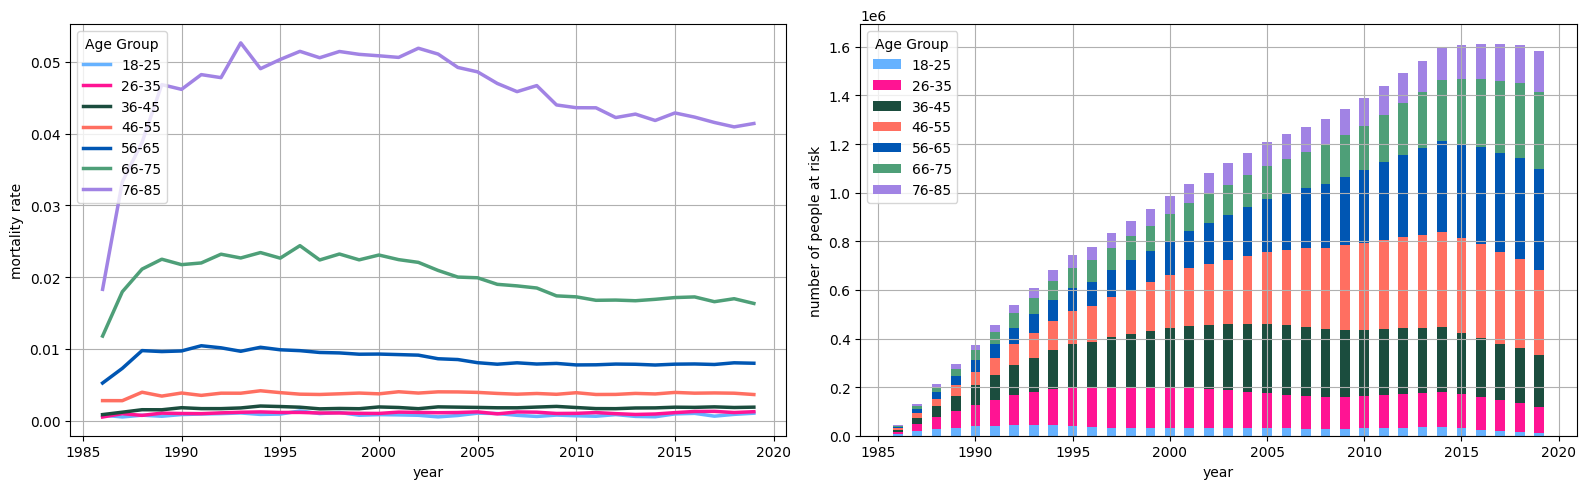

In [6]:
# create figure with two subplots (1 row, 2 columns)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))

colors = ['#66B2FF', '#FF1493', '#1B4D3E', '#FF6F61', '#0056b3', '#4E9F78', '#A183E4']

# plot mortality rates in the first subplot
for i, g in enumerate(group):
    ax1.plot(years, percentages[g], label=g, linewidth=2.5, color=colors[i])

ax1.set_xlabel('year')
ax1.set_ylabel('mortality rate')
ax1.legend(title='Age Group')
ax1.grid(True)

# plot stacked bar chart (number of people at risk) in the second subplot
bottoms = [0] * len(years)
for i, g in enumerate(group):
    ax2.bar(years, counts[g], bottom=bottoms, label=g, color=colors[i], width=0.5)
    bottoms = [b + c for b, c in zip(bottoms, counts[g])]

ax2.set_xlabel('year')
ax2.set_ylabel('number of people at risk')
ax2.legend(title='Age Group')
ax2.grid(True)
plt.tight_layout()
plt.savefig('combined_plot_mortality_rate.jpg', format='jpg')
plt.show()